# Homework 4 

1. Acquire power data (https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand/historic) for 7 days (Include each day of the week)

1. Create two bar graphs of the power consumption per hour.

    * One bar graph has 24 bars showing the average consumption
    * One bar graph has 7x24 bars showing the average demand 

1. Your solution should be committed in your Week04 folder.

Graphs must have appropriate labels and there should not be anything extra cluttering. 

In [36]:
import matplotlib.pyplot as plt

In [37]:
import pandas as pd
df=pd.read_csv('RollingSystemDemand_20221004_1613.csv')
df

,HDR,ROLLING SYSTEM DEMAND
VD,20221001000000,22126.0
VD,20221001000500,22259.0
VD,20221001001000,22597.0
VD,20221001001500,22258.0
VD,20221001002000,22173.0
...,...,...
VD,20221004151500,34404.0
VD,20221004152000,34633.0
VD,20221004152500,34767.0
VD,20221004153000,34833.0


In [38]:
df=df.drop('FTR')

In [39]:

df.columns

Index(['HDR', 'ROLLING SYSTEM DEMAND'], dtype='object')

In [40]:
df.columns=['date','demand',]

In [41]:
df

,date,demand
VD,20221001000000,22126.0
VD,20221001000500,22259.0
VD,20221001001000,22597.0
VD,20221001001500,22258.0
VD,20221001002000,22173.0
...,...,...
VD,20221004151000,34242.0
VD,20221004151500,34404.0
VD,20221004152000,34633.0
VD,20221004152500,34767.0


In [42]:
df['date'] = pd.to_datetime(df['date'].astype(str),
                            format = '%Y%m%d%H%M%S')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1051 entries, VD to VD
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1051 non-null   datetime64[ns]
 1   demand  1051 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.6+ KB


In [44]:
len(df)

1051

In [45]:
df

,date,demand
VD,2022-10-01 00:00:00,22126.0
VD,2022-10-01 00:05:00,22259.0
VD,2022-10-01 00:10:00,22597.0
VD,2022-10-01 00:15:00,22258.0
VD,2022-10-01 00:20:00,22173.0
...,...,...
VD,2022-10-04 15:10:00,34242.0
VD,2022-10-04 15:15:00,34404.0
VD,2022-10-04 15:20:00,34633.0
VD,2022-10-04 15:25:00,34767.0


In [46]:
df['hour'] = pd.DatetimeIndex(df['date']).hour
df['day'] = pd.DatetimeIndex(df['date']).day

In [47]:
df

,date,demand,hour,day
VD,2022-10-01 00:00:00,22126.0,0,1
VD,2022-10-01 00:05:00,22259.0,0,1
VD,2022-10-01 00:10:00,22597.0,0,1
VD,2022-10-01 00:15:00,22258.0,0,1
VD,2022-10-01 00:20:00,22173.0,0,1
...,...,...,...,...
VD,2022-10-04 15:10:00,34242.0,15,4
VD,2022-10-04 15:15:00,34404.0,15,4
VD,2022-10-04 15:20:00,34633.0,15,4
VD,2022-10-04 15:25:00,34767.0,15,4


Text(0, 0.5, 'average consumption in MW')

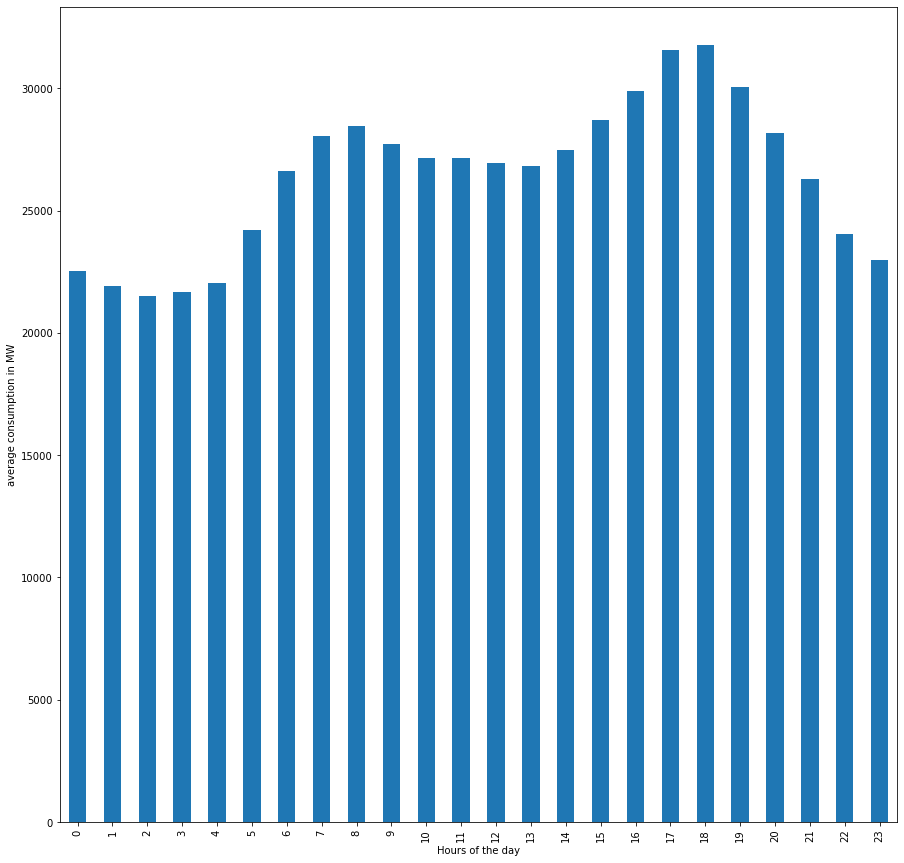

In [48]:
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 15
figure_size[1] = 15
plt.rcParams["figure.figsize"] = figure_size
df['demand'].groupby(df['hour']).mean().plot(kind = 'bar')
plt.xticks(fontsize = 10)
plt.yticks(fontsize  = 10)
plt.xlabel('Hours of the day')
plt.ylabel('average consumption in MW')

In [49]:
df['demand'].groupby([df['date'],df['hour']])

Text(0.5, 1.0, 'Average Power Demand every per week')

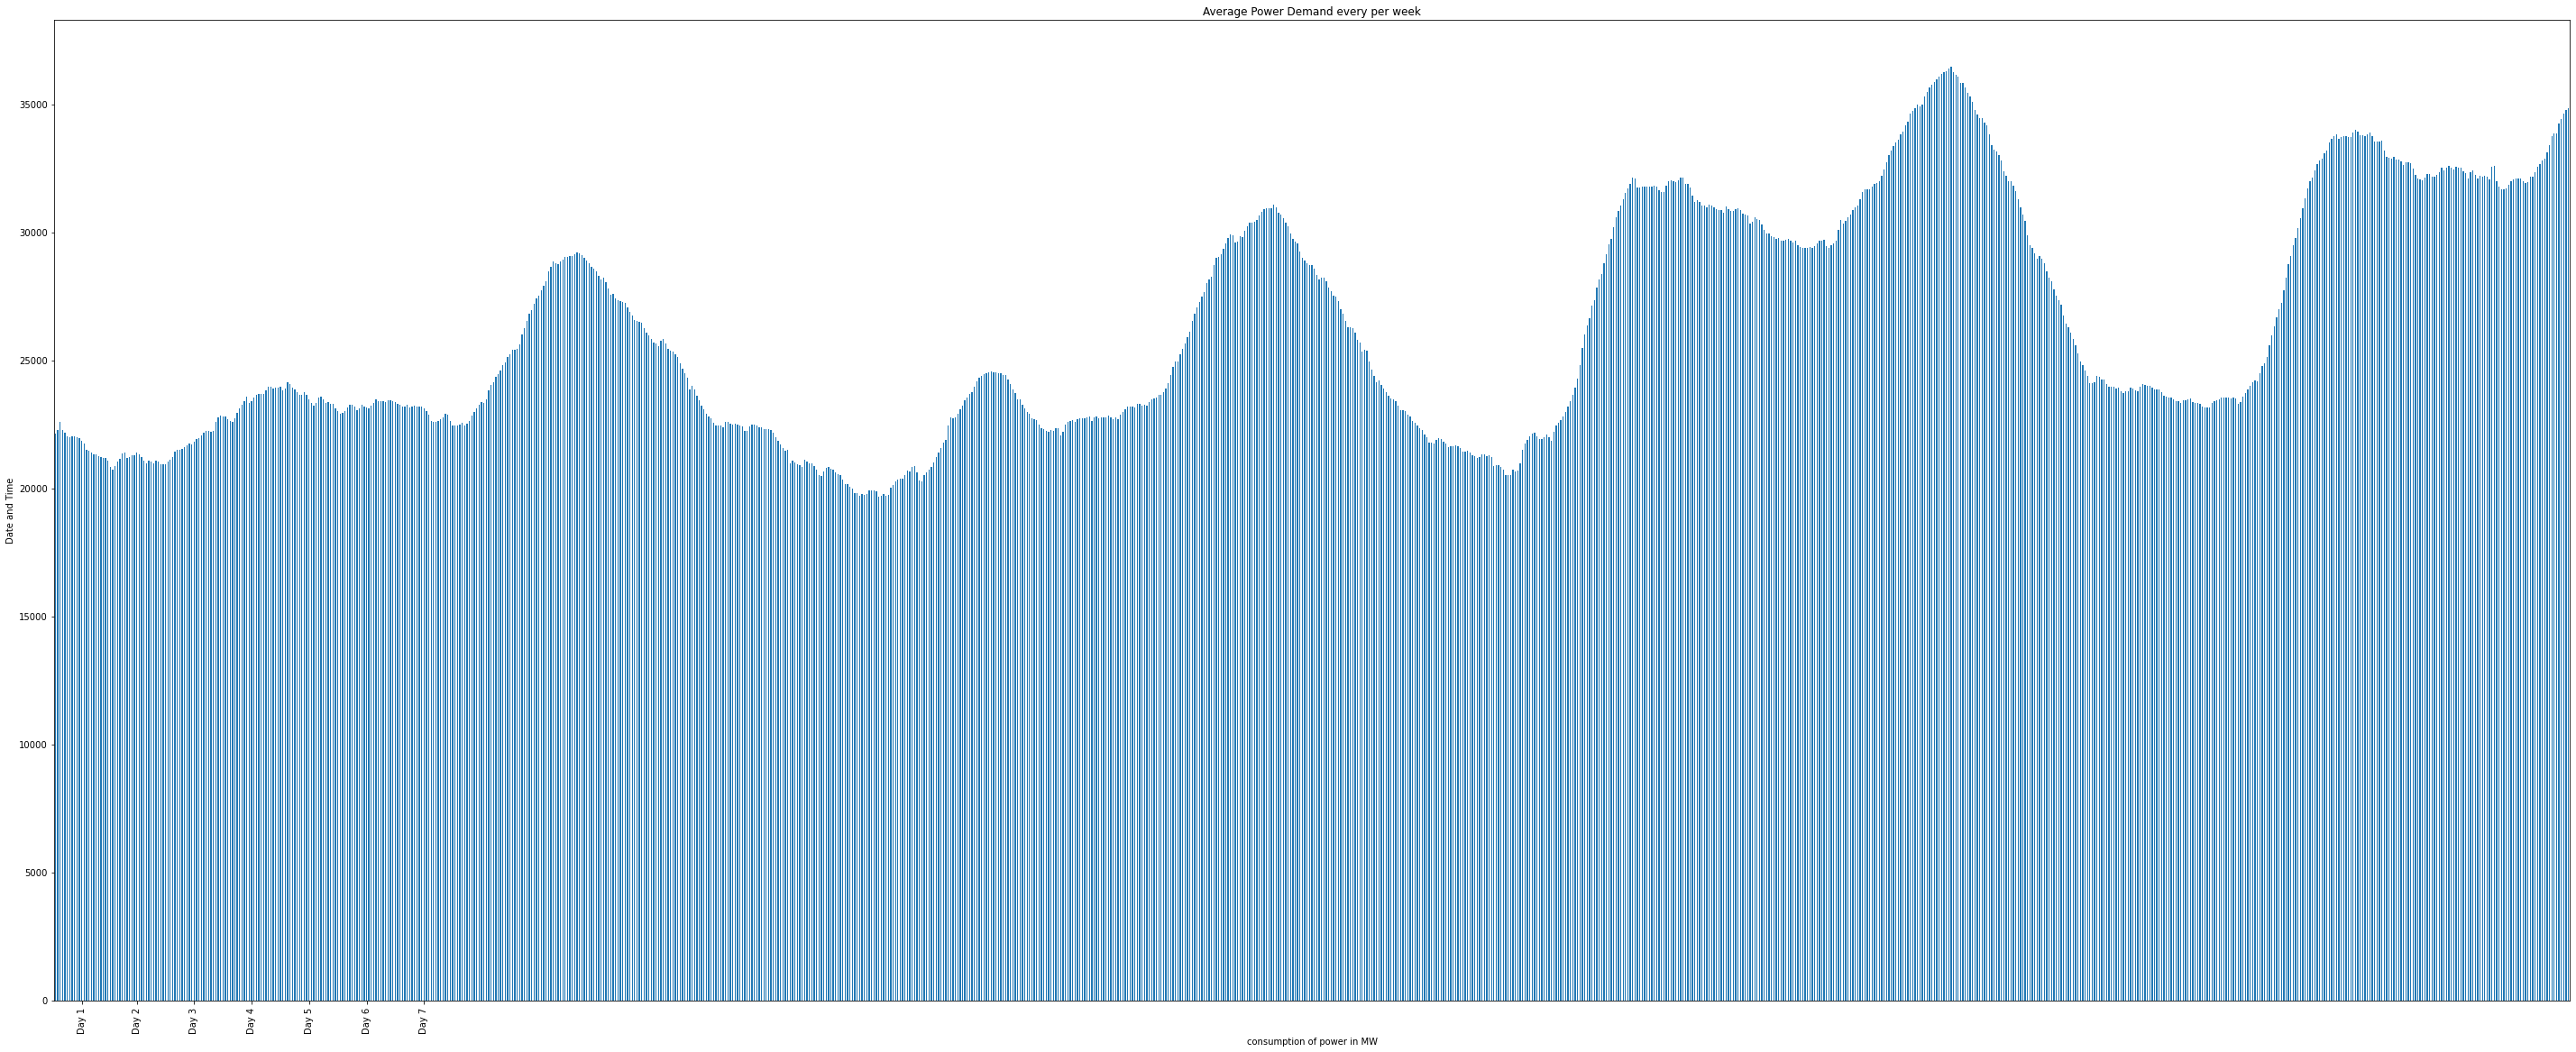

In [50]:
figure_size = plt.rcParams['figure.figsize']
figure_size[0] = 50
figure_size[1] = 20

plt.rcParams['figure.figsize'] = figure_size
df['demand'].groupby([df['date'],df['hour']]).mean().plot(kind='bar')
plt.ylabel('Date and Time')
plt.xlabel('consumption of power in MW', )
plt.xticks([11, 34, 58,82,106,130,154], ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7'])
plt.title('Average Power Demand every per week')